In [1]:
import pandas as pd
import numpy as np
import math
import plotly
import plotly.graph_objects as go
from IPython.display import Latex
from pandas import ExcelWriter
from pandas import ExcelFile

import os

if not os.path.exists("images"):
    os.mkdir("images")
    
def fit(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    a,b = np.linalg.lstsq(A, y, rcond=None)[0]
    return a,b

## Константы

In [8]:
d = {'$N_f,1/s$':[0.8572],'$p \cdot c,keV$':[1013.5], '$k, keV/current SGS$':307.1, '$mc^2,eV$':511875,'$dN_f, 1/s$':0.033, '$E_e,ev$':621}
constans = pd.DataFrame(d)
constans

,"$N_f,1/s$","$p \cdot c,keV$","$k, keV/current SGS$","$mc^2,eV$","$dN_f, 1/s$","$E_e,ev$"
0,0.8572,1013.5,307.1,511875,0.033,621


In [9]:
table = pd.read_excel('5.4.2_data.xlsx',header=1)
table['$N - N_f$'] = pd.Series(table.iloc[:,1] - constans.iloc[0,0])
table['$p,keV/s$']=pd.Series(table.iloc[:,0]*constans.iloc[0,2])
table['$T,keV$']=(np.sqrt((table.iloc[:,3]*1000)**2+constans.iloc[0,3]**2)-constans.iloc[0,3])/1000
table['$\sqrt{N}/p,keV/(s\cdot c)$'] = np.sqrt(abs(table.iloc[:,2]))/(table.iloc[:,3]*1000)*10**6
Latex(table.to_latex(index=False))

<IPython.core.display.Latex object>

In [6]:
Latex(table.to_latex(index=False,escape=False))

<IPython.core.display.Latex object>

In [18]:
plotly.io.orca.config.executable = '/Users/pavel/anaconda3/bin/orca'
plotly.io.orca.status

orca status
-----------
    state: unvalidated
    executable: None
    version: None
    port: None
    pid: None
    command: None


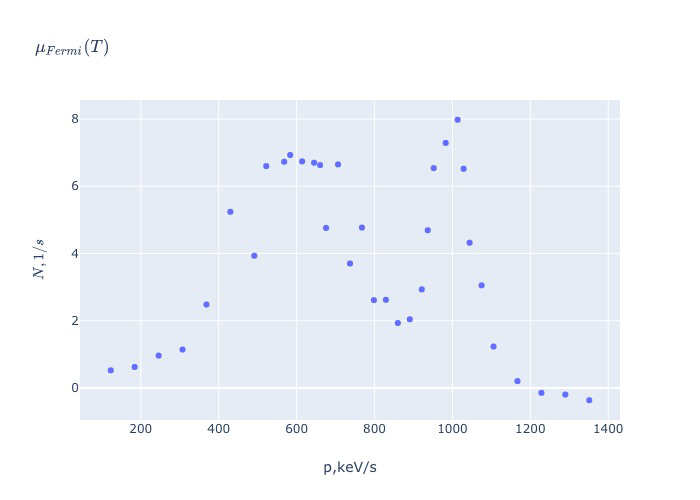

In [30]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x = table.iloc[:,3],y=table.iloc[:,2],
                    mode='markers'))
fig1.update_layout(xaxis_title='p,keV/s',
                    yaxis_title='$N,1/s$',
                   title=go.layout.Title(
                       text="$\mu_{Fermi}(T)$"))
#fig1.show()
fig1.write_image("images/fig1.jpg")
from PIL import Image
Image.open("images/fig1.jpg")

In [26]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x = table.iloc[:,0],y=table.iloc[:,2],
                    mode='markers'))
fig2.update_layout(xaxis_title='$I,A$',
                   yaxis_title='$N,1/s$',
                   title=go.layout.Title(
                       text="$N(I)$"))
#fig2.show()



NameError: name 'Image' is not defined

In [4]:
a,b = fit (table.iloc[9:13,4],table.iloc[9:13,5])
x = np.linspace(table.iloc[9,4],table.iloc[13,4],100)
y = x*a+b

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x = table.iloc[:,4],y=table.iloc[:,5],
                    mode='markers',name='data'))
fig3.add_trace(go.Scatter(x = x,y = y, mode='lines',name = 'уравнение %.4f *x+%.4f' % (a,b)))

fig3.update_layout(xaxis_title='T,keV',
                   yaxis_title='$\mu_{fermi}$',
                   title=go.layout.Title(
                       text="$\mu_{Fermi}(T)$"))

fig3.show()


IndexError: single positional indexer is out-of-bounds